In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Responses DTC Bus - Form responses 1.csv")

In [4]:
condition = data['Gender'] == "Male"
data.loc[condition, 'If ticket is not free what will be your choice of bus?(only for women)'] = np.nan

In [5]:
condition = data['Gender'] == "Female"
data.loc[condition, 'If ticket is free what will be your choice of bus?(only for men)'] = np.nan

In [6]:
data = data.drop('If ticket is not free what will be your choice of bus?(only for women).1', axis=1)
data = data.drop('Unnamed: 18', axis=1)
data = data.drop('Have you ever travelled without a ticket?', axis=1)
data = data.drop('Timestamp', axis=1)

In [7]:
data = data.rename(columns={'If ticket is not free what will be your choice of bus?(only for women)': 'If not free ticket choice women','If ticket is free what will be your choice of bus?(only for men)': 'If free ticket choice men', 'Choice of DTC bus while travelling solo?': 'Bus Choice', 'Choice of DTC bus while travelling in a group?': 'Group Travel','Do you consider weather while choosing the AC/Non AC Bus?': 'Weather', 'Do you consider ticket price while choosing the AC/NON AC Bus?': 'Ticket Price', 'Do you consider distance of travel while choosing the AC/NON AC Bus?': 'Distance of Travel', 'Do you consider wait time while choosing the AC/NON AC Bus?': 'Wait Time', 'Do you consider bus occupancy while choosing the AC/NON AC Bus?': 'Bus Occupancy', 'Do you consider bus condition while choosing the AC/NON AC Bus?': 'Bus Condition', 'Do you consider your current health condition while choosing the AC/NON AC Bus?': 'Health Condition', 'Do you consider comfort while choosing the AC/NON AC Bus?': 'Comfort', 'Do you consider frequency of travel a factor while choosing the AC/NON AC Bus?': 'Frequency of Travel' })

In [8]:
condition = data['If not free ticket choice women'] == "Does Not Affect"
data.loc[condition, 'If not free ticket choice women'] = "Not Affected"
condition = data['Age (years)'] == "35 -50"
data.loc[condition, 'Age (years)'] = "35 - 50"
condition = data['If free ticket choice men'] == "Does Not Affect"
data.loc[condition, 'If free ticket choice men'] = "Not Affected"
data.info()
unique_values = data['Age (years)'].unique()
print(unique_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           120 non-null    object
 1   Age (years)                      120 non-null    object
 2   Employment Status                120 non-null    object
 3   If not free ticket choice women  61 non-null     object
 4   If free ticket choice men        59 non-null     object
 5   Bus Choice                       120 non-null    object
 6   Group Travel                     120 non-null    object
 7   Weather                          120 non-null    object
 8   Ticket Price                     120 non-null    object
 9   Distance of Travel               120 non-null    object
 10  Wait Time                        120 non-null    object
 11  Bus Occupancy                    120 non-null    object
 12  Bus Condition                    120

In [9]:
data['If not free ticket choice women'] = data['If not free ticket choice women'].replace({'Not affected': 'Not Affected'})
data['If free ticket choice men'] = data['If free ticket choice men'].replace({'Not affected': 'Not Affected'})
data = data.drop('Group Travel', axis = 1)
data['Bus Choice'] = data['Bus Choice'].replace({'NON AC': 'Non AC'})
data = data.drop('If not free ticket choice women', axis = 1)
data = data.drop('If free ticket choice men', axis = 1)

In [10]:
data = data.drop('Employment Status', axis = 1)
data.to_csv('Stats_Treated_Data_Yaman.csv', index=False)
import matplotlib.pyplot as plt

In [11]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               120 non-null    object
 1   Age (years)          120 non-null    object
 2   Bus Choice           120 non-null    object
 3   Weather              120 non-null    object
 4   Ticket Price         120 non-null    object
 5   Distance of Travel   120 non-null    object
 6   Wait Time            120 non-null    object
 7   Bus Occupancy        120 non-null    object
 8   Bus Condition        120 non-null    object
 9   Health Condition     120 non-null    object
 10  Comfort              120 non-null    object
 11  Frequency of Travel  120 non-null    object
dtypes: object(12)
memory usage: 11.4+ KB


,Gender,Age (years),Bus Choice,Weather,Ticket Price,Distance of Travel,Wait Time,Bus Occupancy,Bus Condition,Health Condition,Comfort,Frequency of Travel
0,Male,18 - 34,AC,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
1,Male,18 - 34,AC,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Neutral
2,Male,18 - 34,AC,Agree,Disagree,Agree,Strongly Agree,Strongly Agree,Neutral,Disagree,Strongly Agree,Agree
3,Male,18 - 34,AC,Disagree,Agree,Neutral,Agree,Strongly Disagree,Agree,Strongly Agree,Agree,Agree
4,Male,18 - 34,AC,Neutral,Agree,Agree,Agree,Agree,Agree,Disagree,Agree,Disagree


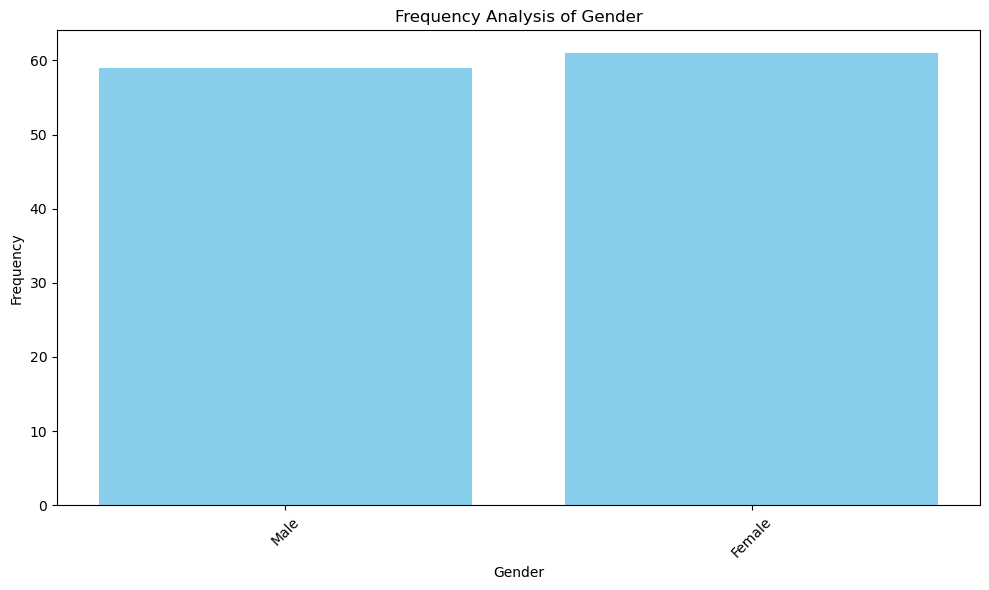

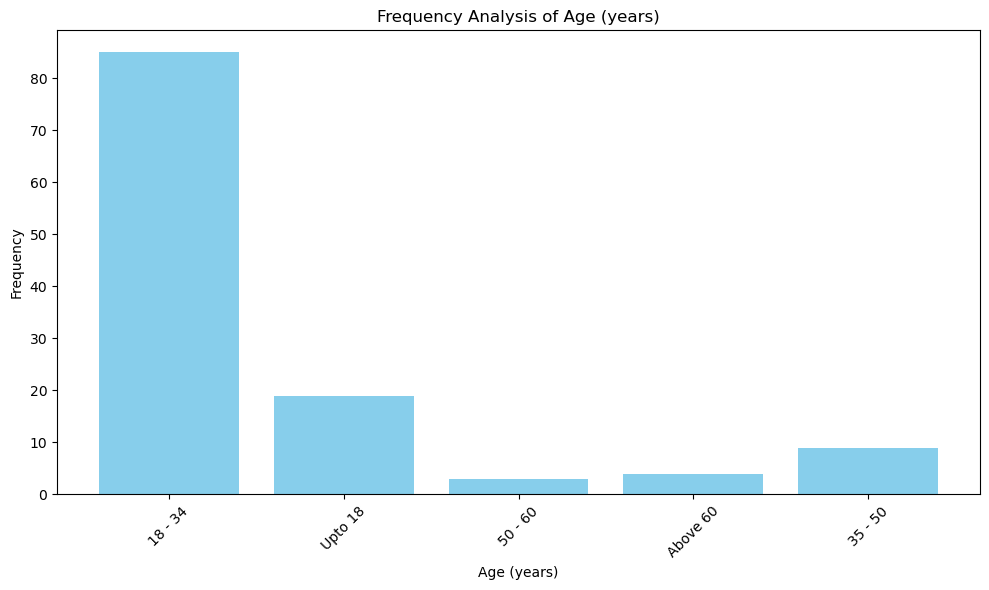

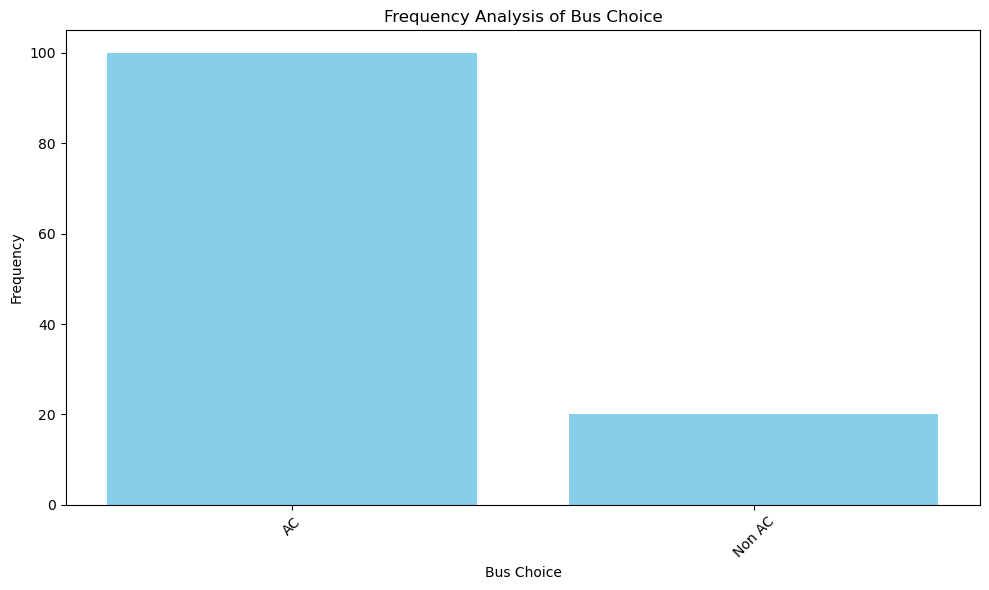

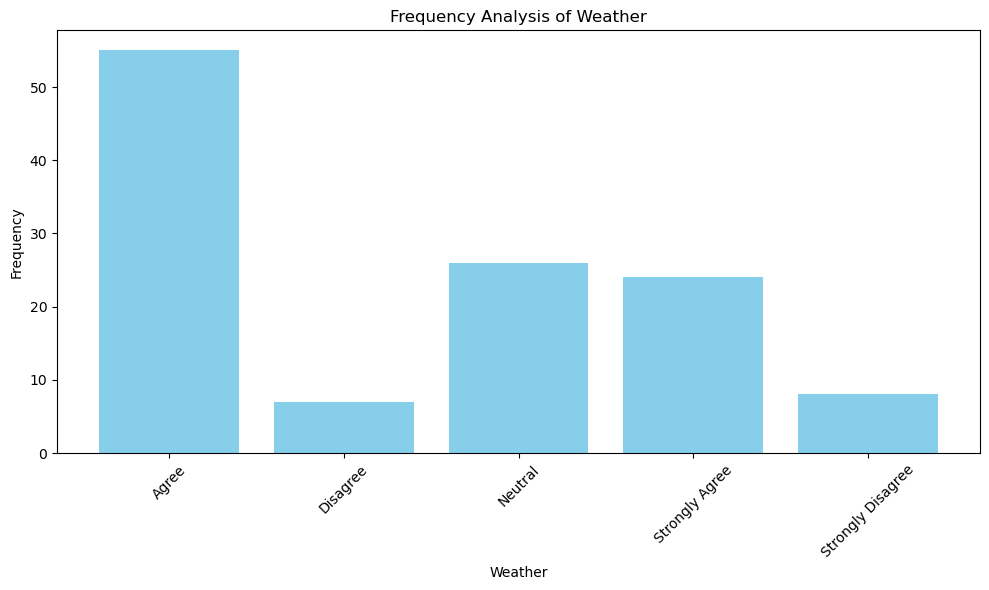

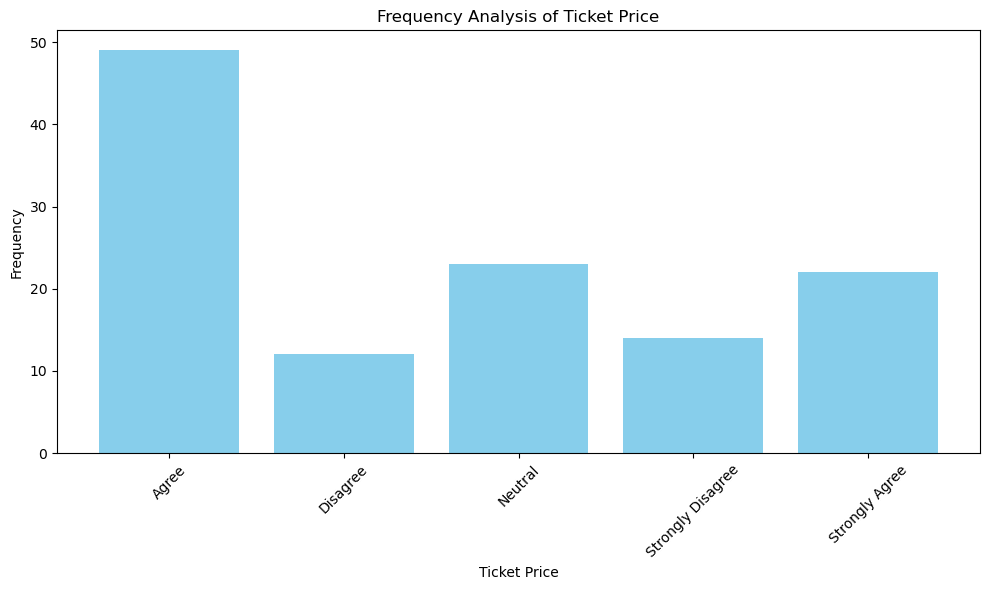

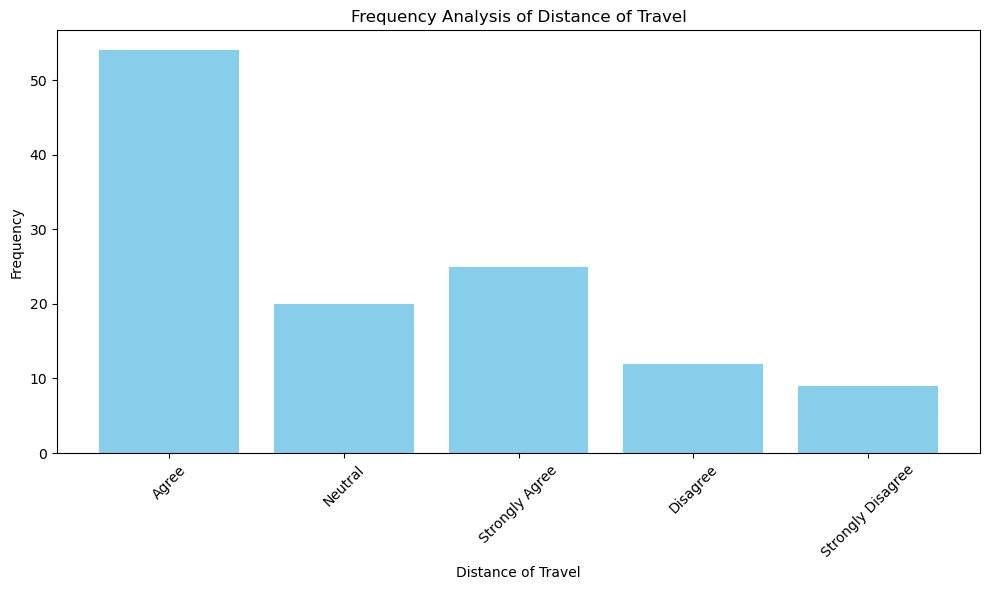

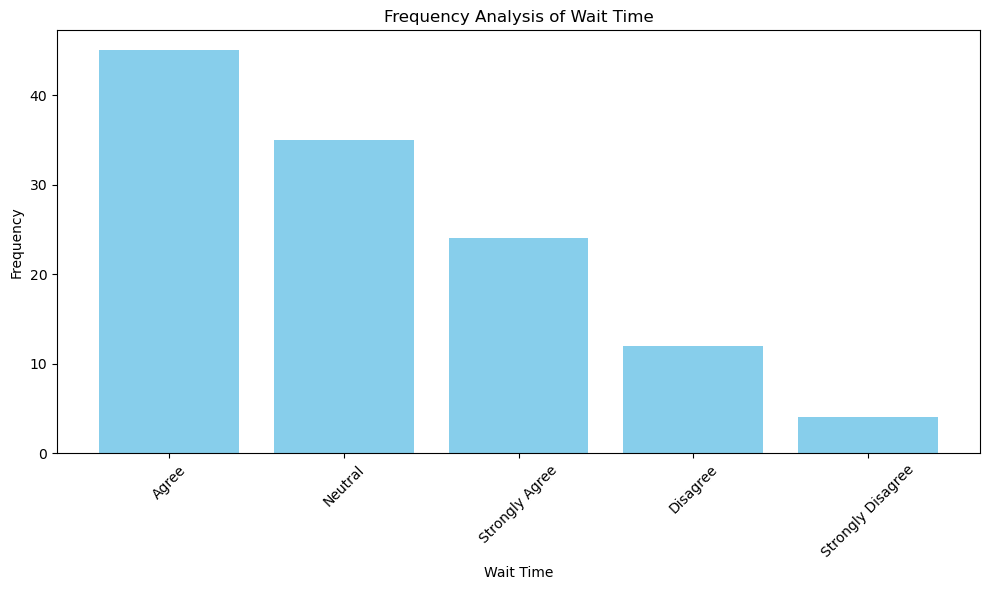

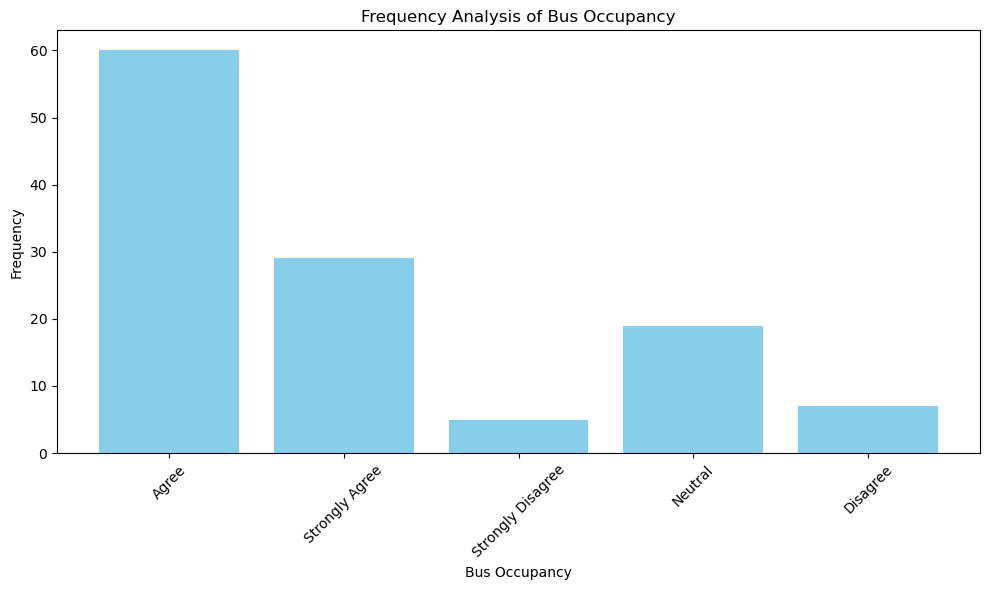

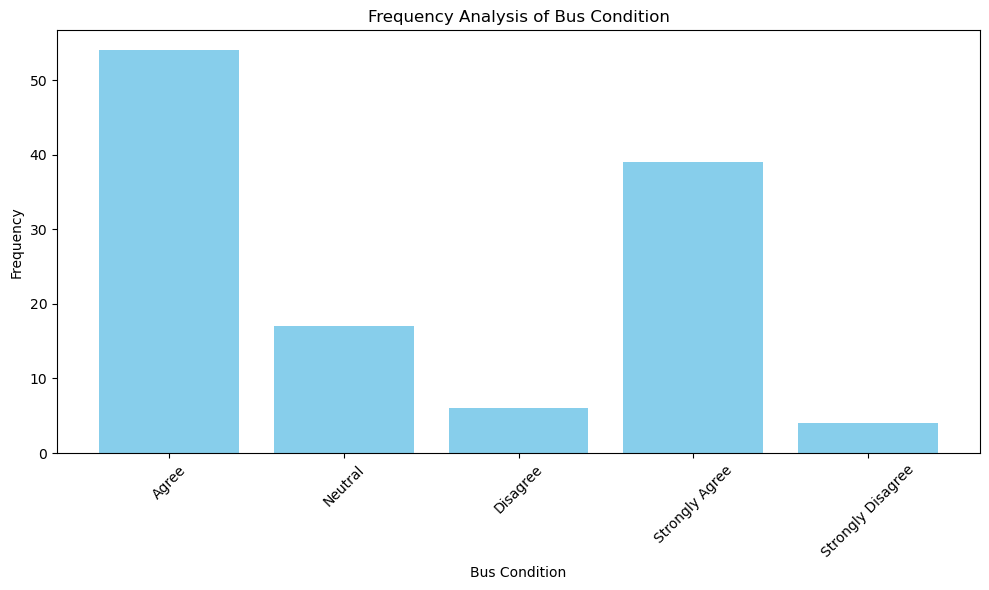

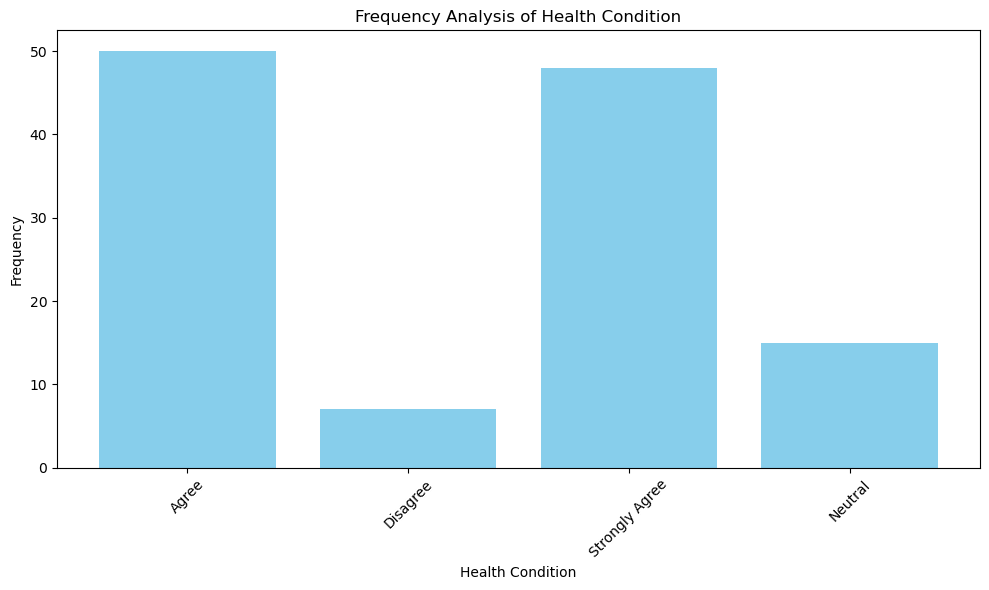

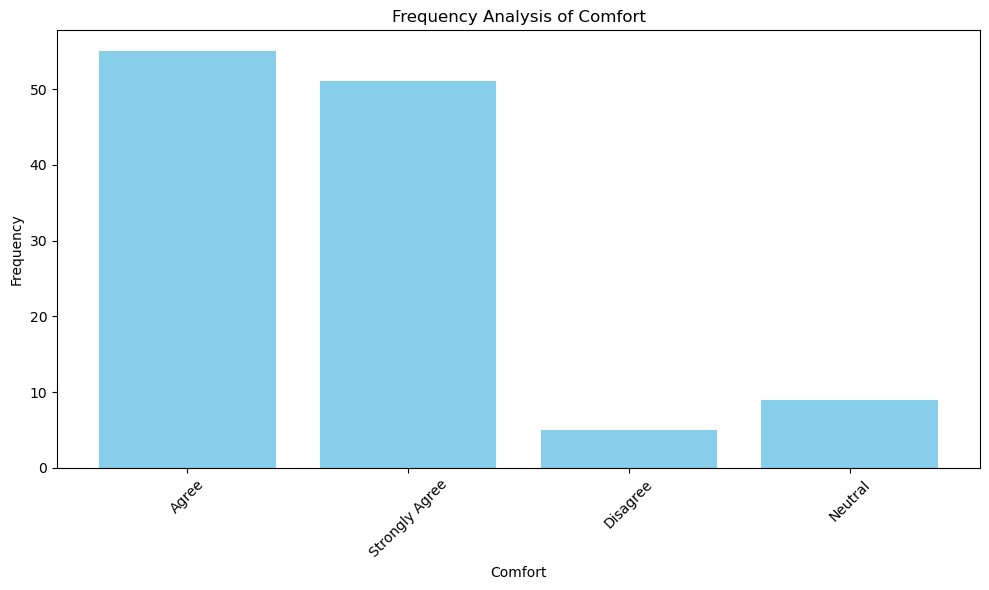

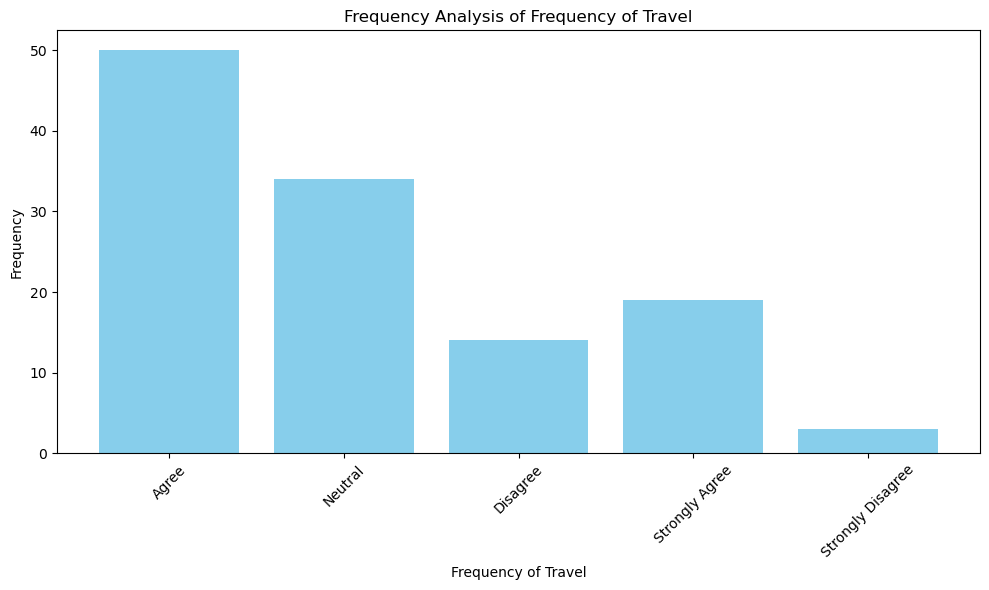

In [12]:
for column_name in data.columns:
    # Check if the column is categorical (non-numeric)
    if data[column_name].dtype == 'object':
        # Calculate the frequency of unique values in the column
        frequency_counts = data[column_name].value_counts().reindex(data[column_name].unique(), fill_value=0)
        
        # Create a new figure and axis for each column
        plt.figure(figsize=(10, 6))
        plt.bar(frequency_counts.index, frequency_counts.values, color='skyblue')
        plt.title(f'Frequency Analysis of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for readability
        plt.tight_layout()  # Ensure labels fit in the plot area
        plt.show()

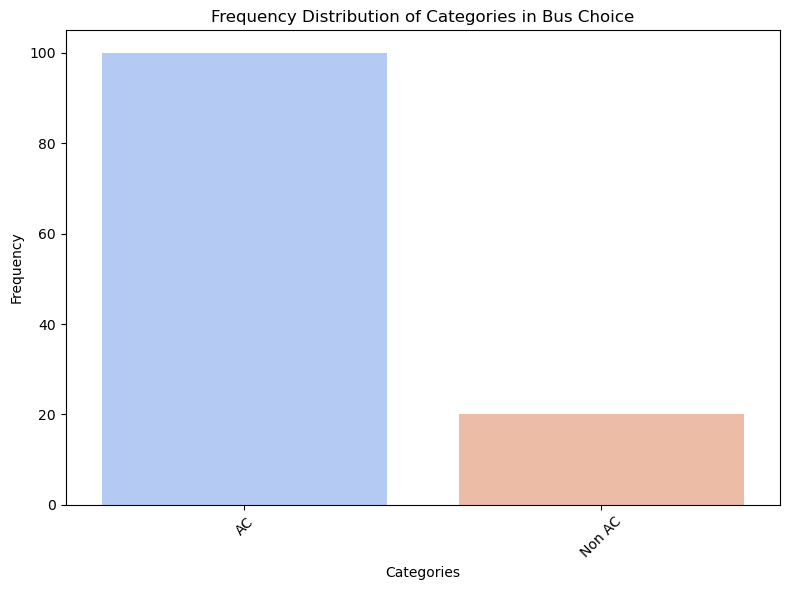

In [13]:
import seaborn as sns
category_order = ["AC", "Non AC"]
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Bus Choice', order=category_order, palette='coolwarm')
plt.title(f'Frequency Distribution of Categories in Bus Choice')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Bus Choice', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
likert_mapping = {
    "Strongly Agree": 5,
    "Agree": 4,
    "Neutral": 3,
    "Disagree": 2,
    "Strongly Disagree": 1
}

data['Weather'] = data['Weather'].map(likert_mapping)
data['Ticket Price'] = data['Ticket Price'].map(likert_mapping)
data['Distance of Travel'] = data['Distance of Travel'].map(likert_mapping)
data['Wait Time'] = data['Wait Time'].map(likert_mapping)
data['Bus Occupancy'] = data['Bus Occupancy'].map(likert_mapping)
data['Bus Condition'] = data['Bus Condition'].map(likert_mapping)
data['Health Condition'] = data['Health Condition'].map(likert_mapping)
data['Comfort'] = data['Comfort'].map(likert_mapping)
data['Frequency of Travel'] = data['Frequency of Travel'].map(likert_mapping)

In [15]:
data = data.drop('Age (years)', axis = 1)
data['Bus Choice'] = data['Bus Choice'].replace({'AC': 1,'Non AC': 0, 'NON AC': 0})

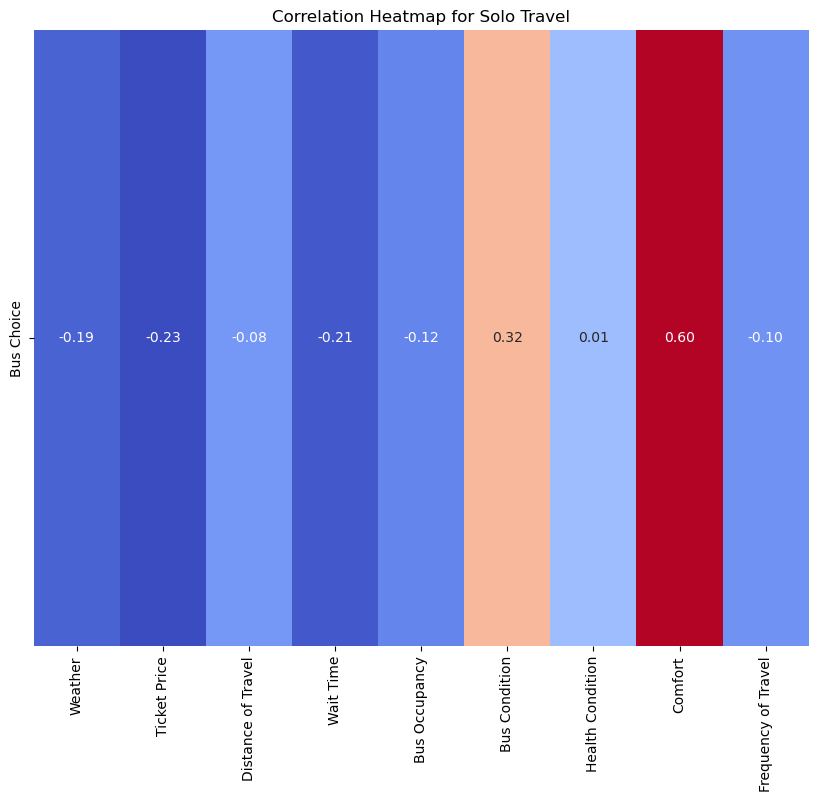

In [16]:
target_column = 'Bus Choice'

# Calculate correlations with the target column
correlations = 2.5 * data.corr()[[target_column]]

# Remove the self-correlation
correlations = correlations.drop(target_column)

# Create a heatmap of the correlations
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlations.T, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title(f'Correlation Heatmap for Solo Travel')
plt.savefig('Correlation_Heatmap_Modified.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
data.to_csv('Stats_Treated_Data.csv', index=False)
data = data.drop('Bus Choice', axis = 1)

In [23]:
df1 = data[data['Gender'] == 'Male']
df2 = data[data['Gender'] == 'Female']

In [24]:
df1.to_csv('Male_Data.csv', index=False)
df2.to_csv('Female_Data.csv', index=False)

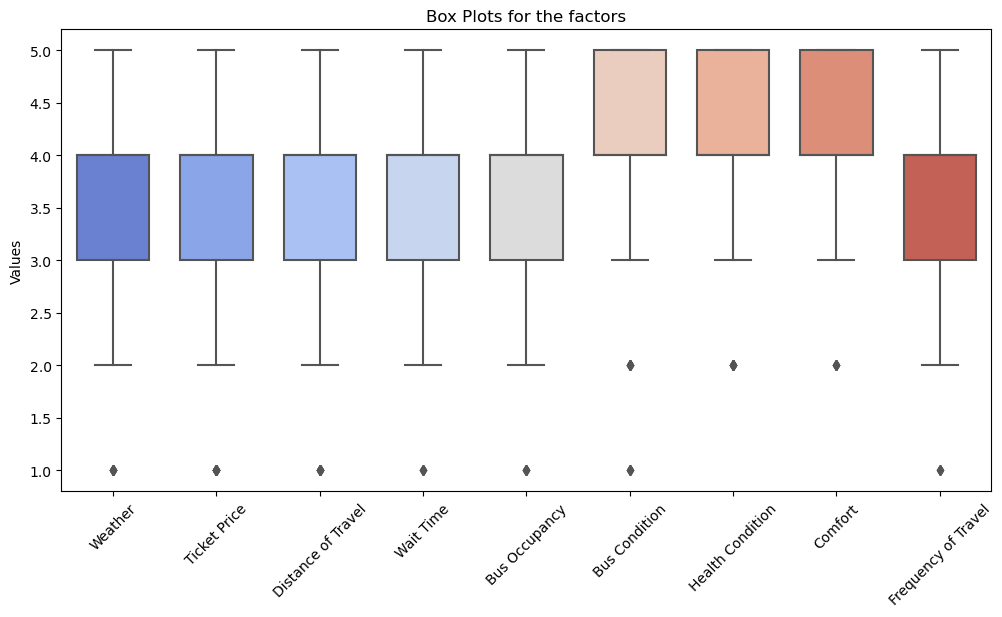

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient='v', width=0.7, palette='coolwarm')
plt.title('Box Plots for the factors')
plt.ylabel('Values')
plt.xticks(rotation=45) 
plt.savefig('BoxPlot.png', dpi=300, bbox_inches='tight')# Rotate x-axis labels if necessary
plt.show()


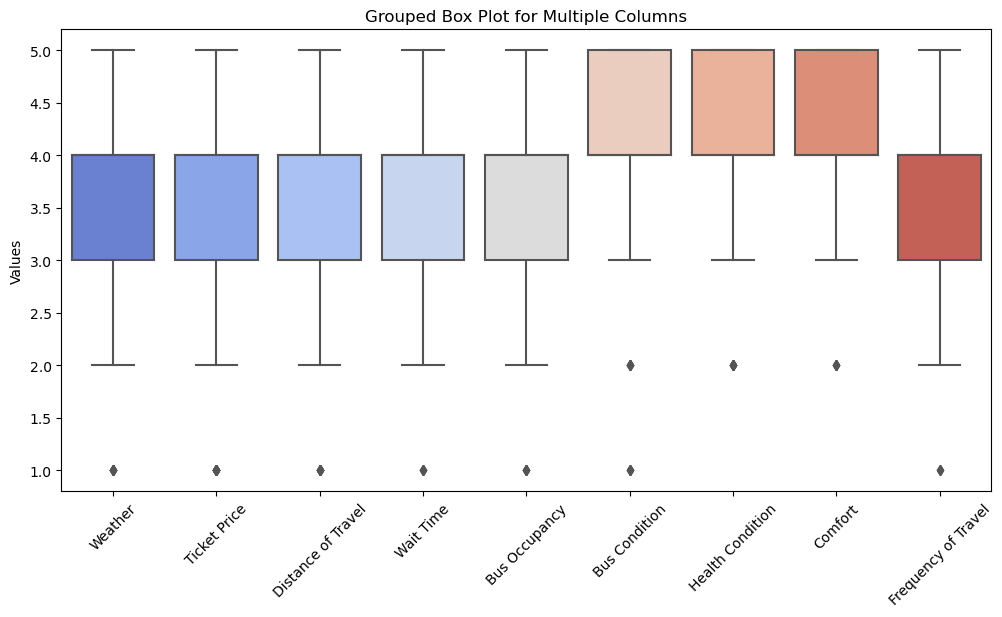

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient='v', palette='coolwarm')
plt.title('Grouped Box Plot for Multiple Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

In [28]:
from scipy.stats import zscore

In [30]:
data = data.drop('Gender', axis = 1)
z_scores = data.apply(zscore)

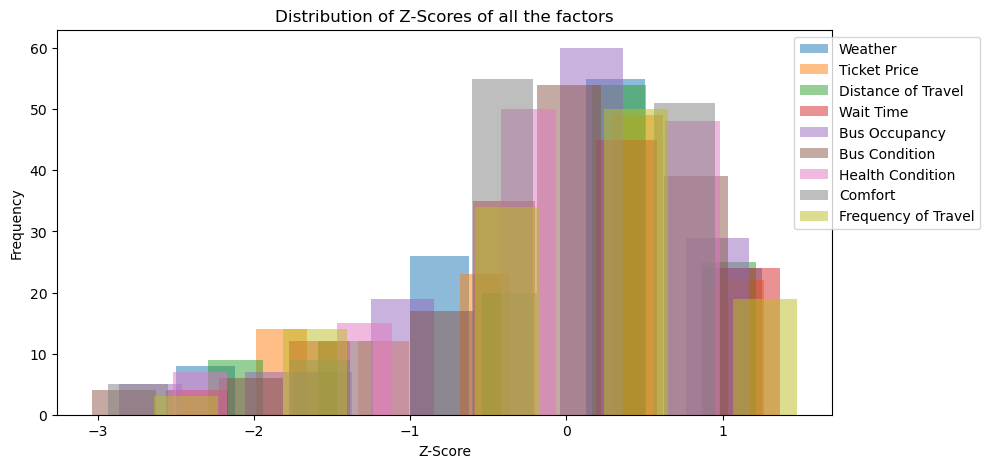

In [33]:
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
for i, column in enumerate(z_scores.columns):
    plt.hist(z_scores[column], bins=10, alpha=0.5, label=column, color=f'C{i}')

plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-Scores of all the factors')

# Create a legend outside the plot
legend_labels = z_scores.columns
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1))

# Save the plot as an image (e.g., PNG format)
plt.savefig('Histogram_Overall.png', dpi=300, bbox_inches='tight')  # Adjust format and DPI as needed

# Display the plot (optional)
plt.show()